##**Importando ferramentas**

In [7]:
from datetime import datetime
from pymongo import MongoClient
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

##**Importação dos dados**

In [8]:
mongo_client = MongoClient(host='20.84.71.186', port=27017, username='mongoadmin', password='secret')
db = mongo_client['orbit']
collection = db['metrics_7']

##**Tratamento dos dados**

In [9]:
data = collection.find()
df = pd.DataFrame(list(data))
df = df.fillna(0)

df = df.astype({'time_response_get': float, 
                'time_response_post': float, 
                'cpu_usage': float, 
                'available': float, 
                'memory_used': float, 
                'heap_used': float, 
                'non_heap_used': float
                })

i = 0
while i < len(df['time_response_get']):
  if df['time_response_get'][i] > 20:
    df['available'] = 0
  else:
    df['available'] = 1
  i = i + 1

##**Plot da correlação**

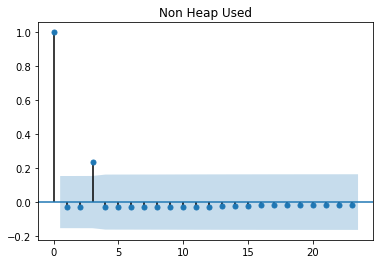

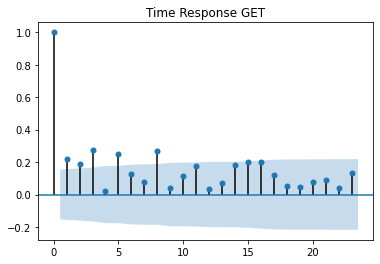

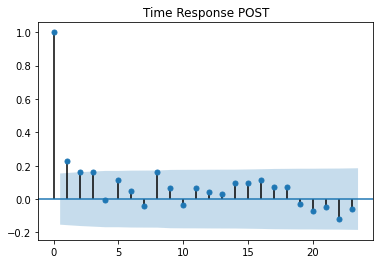

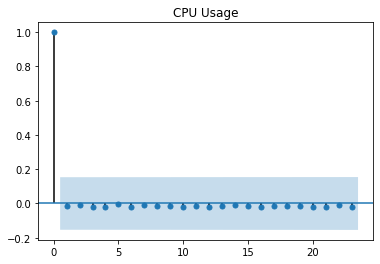

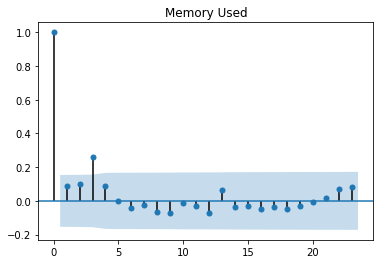

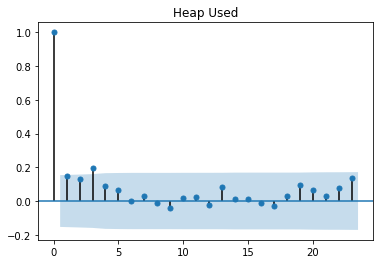

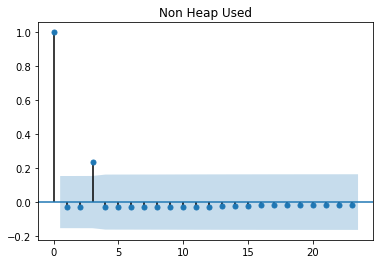

In [10]:
plot_acf(df['time_response_get'], title='Time Response GET')
plot_acf(df['time_response_post'], title='Time Response POST')
plot_acf(df['cpu_usage'], title='CPU Usage')
plot_acf(df['memory_used'], title='Memory Used')
plot_acf(df['heap_used'], title='Heap Used')
plot_acf(df['non_heap_used'], title='Non Heap Used')